Challenge 1
Generate (fake) data that is linearly related to log(x).

You are making this model up. It is of the form B0 + B1*log(x) + epsilon. (You are making up the parameters.)

Simulate some data from this model.

Then fit two models to it:

1. quadratic (second degree polynomial)
2. logarithmic (log(x))
(The second one should fit really well, since it has the same form as the underlying model!)

In [79]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import matplotlib.pyplot as plt 
from sklearn.preprocessing import PolynomialFeatures, FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold
%matplotlib inline

In [2]:
def f(x):
    return 1+2*np.log(x)
n_sample = 100 
#generate random x within 0-50 with the sample size of 100 
X = np.random.uniform(0,50, size=n_sample)[:,np.newaxis] #np.newaxis forces X into a matrix
y=f(X) +np.random.normal(scale=0.3, size=n_sample)[:,np.newaxis]

In [3]:
#now we have our x&y, let's try fitting it to a second degree polynomial 
degree = 2 
est = make_pipeline(PolynomialFeatures(degree), LinearRegression(fit_intercept = False))
polyfit = est.fit(X,y)

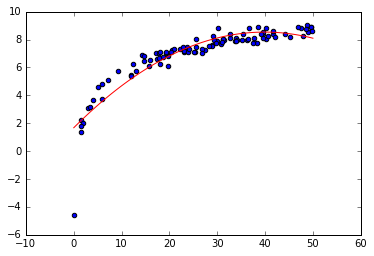

In [4]:
#visualization 
plt.scatter(X,y)
x_plot = np.linspace(0, 50, 100)
plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]), color='red',)

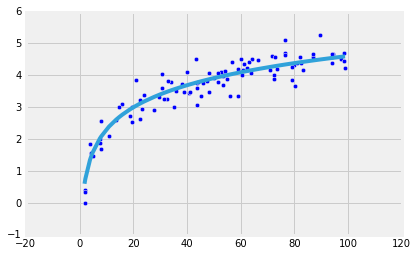

In [36]:
#now let's try this on the log model
logmodel = make_pipeline(FunctionTransformer(np.log), LinearRegression(fit_intercept = False))
logmodel.fit(X,y)

plt.scatter(X,y)
x_plot = np.linspace(0, 50, 100)

plt.plot(sorted(X),logmodel.predict(sorted(X)))

Challenge 2
Generate (fake) data from a model of the form B0 + B1*x + B2*x^2 + epsilon. (You are making up the parameters.)

Split the data into a training and test set.

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.

(You could use sklearn.metrics.mean_squared_error.)

In [38]:
def f(x):
    return 1+2*x + 3 *x**2
n_sample = 100 
#generate random x within 0-50 with the sample size of 100 
X = np.random.uniform(0,50, size=n_sample)[:,np.newaxis] #np.newaxis forces X into a matrix
y=f(X) +np.random.normal(scale=0.3, size=n_sample)[:,np.newaxis]

In [39]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size = 0.3)

In [49]:
degree = 2 
est= make_pipeline(PolynomialFeatures(degree), LinearRegression())
fit = est.fit (X,y)

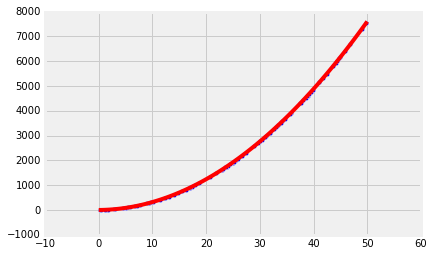

In [50]:
#visualize our model and data 
plt.scatter(X,y)
x_plot = np.linspace(0, 50, 100)
plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]), color='red',)

In [55]:
#calculate mse 
pred_train = est.predict(X_train)
pred_test =est.predict(X_test)
trainMSE = mean_squared_error(y_train, pred_train)
testMSE = mean_squared_error(y_test,pred_test)
print(trainMSE)

0.0917203931284


In [56]:
print(testMSE)

0.0906078585658


Challenge 3

For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points),


plot:

training error
test error
R squared
AIC

In [76]:
trainerr = []
testerr = []
trainr2 = []
testr2 = []
AIC = []#not sure how to calculate AIC here
for degree in range(0,8):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(X, y)
    #get all the training error
    pred_train = est.predict(X_train) 
    pred_test = est.predict(X_test)
    trainerr.append(mean_squared_error(y_train,pred_train))
    testerr.append(mean_squared_error(y_test,pred_test))
    trainr2.append(est.score(X_train,y_train))
    testr2.append(est.score(X_test,y_test))

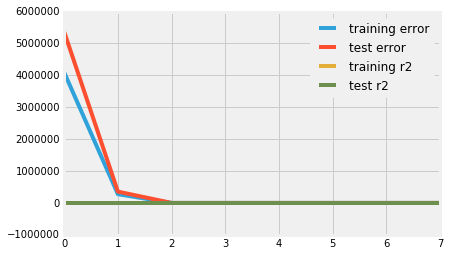

In [78]:
plt.plot (trainerr, label = 'training error')
plt.plot(testerr, label = 'test error')
plt.plot(r2, label = 'training r2')
plt.plot(r2, label = 'test r2')
plt.legend()

Challenge 4

For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.

In [96]:
train_test_size = np.linspace(0.1,0.9,9)
trainerr=[]
testerr = []

for i in train_test_size:
    X_train,X_test,y_train,y_test= train_test_split(X,y,test_size = i)
    est = make_pipeline(PolynomialFeatures(2),LinearRegression())
    est.fit(X_train, y_train)
    pred_train = est.predict(X_train)
    pred_test = est.predict(X_test)
    trainerr.append(mean_squared_error(y_train, pred_train))
    testerr.append(mean_squared_error(y_test,pred_test))
    

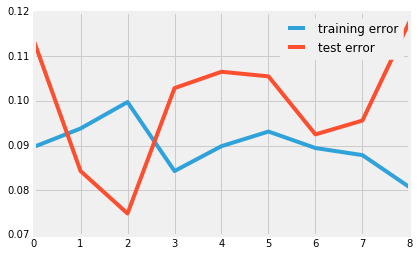

In [101]:
plt.plot(trainerr, label = 'training error')
plt.plot(testerr,label = 'test error')
plt.legend()